In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use('.matplotlibrc')

In [7]:
# In pandas you can pass the url directly into read_csv()
pollution = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [ ]:
pollution.columns

In [ ]:
pollution.head()

In [12]:
pollution = pollution.rename(
    columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
        'Entity': 'City',
        'Smoke (Fouquet and DPCC (2011))' : 'Smoke'
    }
)

In [13]:
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [14]:
pollution['City'].unique()

array(['Delhi', 'London'], dtype=object)

In [15]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [16]:
# careful: pollution['Year'] = pd.to_datetime(pollution['Year'])
# pandas doesn't handle dates before 1900!
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)

In [17]:
pollution.Year.min(), pollution.Year.max()

(Timestamp('1700-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00'))

In [18]:
pollution.isnull().sum() / len(pollution)

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [19]:
pollution.describe()

,Smoke,SPM
count,301.000000,331.000000
mean,210.296440,365.970050
std,88.543288,172.512674
min,13.750000,15.000000
25%,168.571429,288.474026
50%,208.214286,375.324675
75%,291.818182,512.609209
max,342.857143,623.376623


Text(0, 0.5, 'Frequency')

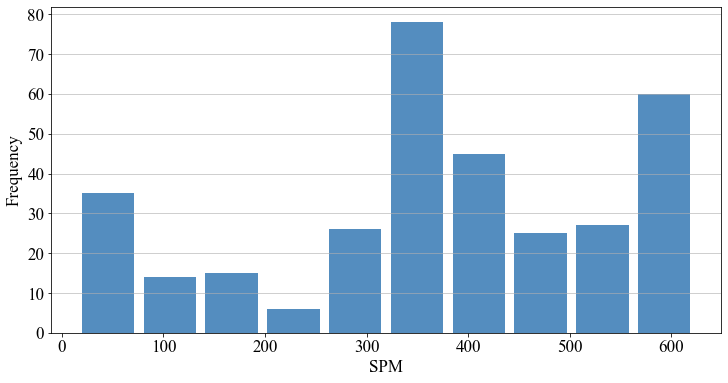

In [22]:
import numpy as np
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

<Figure size 864x432 with 0 Axes>

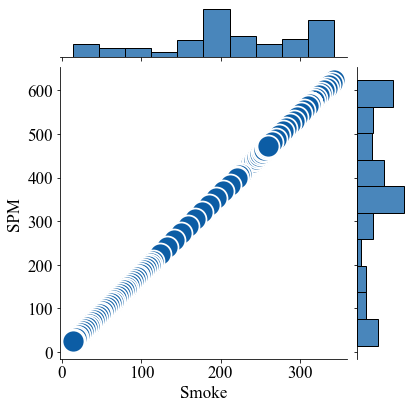

In [21]:
plt.figure(figsize=(12, 6))
sns.jointplot(
    x='Smoke', y='SPM',
    edgecolor='white',
    data=pollution
)
plt.xlabel('Smoke')
plt.ylabel('SPM');

In [ ]:
def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]


stats.pearsonr(*ignore_nans(pollution['Smoke'], pollution['SPM']))

In [ ]:
pollution.dtypes

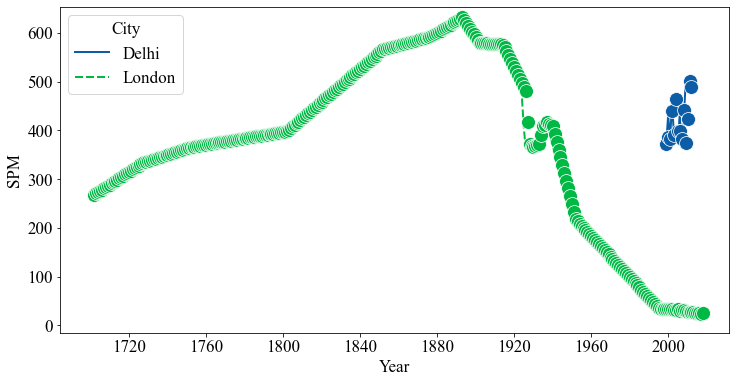

In [23]:
pollution = pollution.pivot("Year", "City", "SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

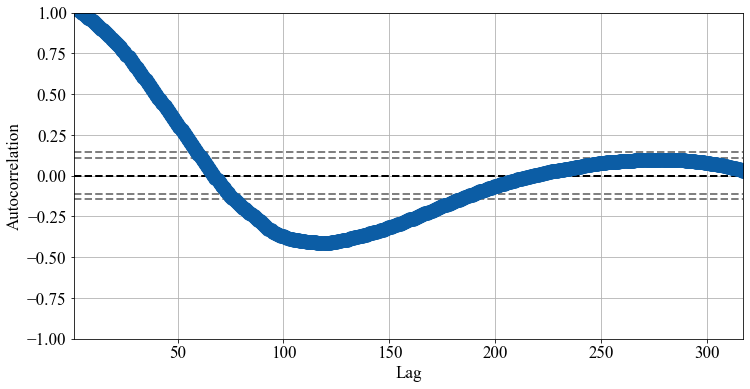

In [24]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(pollution['London']);

In [25]:
from statsmodels.tsa import stattools

stattools.adfuller(pollution['London'])

(-0.3372164080424281,
 0.9200654843183897,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

In [27]:
from scipy import stats

stats.pearsonr(pollution['London'], pollution.index.values.astype(int))

(-0.3638129283005383, 2.352312970699005e-11)

In [28]:
stats.spearmanr(pollution['London'][:180], pollution.index.values.astype(int)[:180])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)